In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [69]:
train_df = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv")
test_df = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv")
df3 = pd.read_csv("/kaggle/input/heartbeat/ptbdb_normal.csv")
df4 = pd.read_csv("/kaggle/input/heartbeat/ptbdb_abnormal.csv")

In [71]:
print(f"{train_df.shape}\n{test_df.shape}\n{df3.shape}\n{df4.shape}")
train.describe()
test.describe()

(87553, 188)
(21891, 188)
(4045, 188)
(10505, 188)


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,...,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000
mean,0.894405,0.761902,0.426641,0.221606,0.201682,0.209897,0.204811,0.200999,0.197640,0.196030,...,0.004588,0.004328,0.004020,0.003789,0.003639,0.003459,0.003167,0.003000,0.002946,0.473711
std,0.234564,0.218664,0.228568,0.208710,0.177730,0.172195,0.177948,0.176143,0.170229,0.166707,...,0.043129,0.042188,0.040256,0.039398,0.038536,0.037718,0.035904,0.035523,0.035267,1.143469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924254,0.683355,0.251220,0.050514,0.082873,0.087912,0.072678,0.066003,0.064516,0.068506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432781,0.167641,0.147651,0.158120,0.144068,0.144509,0.150442,0.149038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912320,0.583994,0.347097,0.259227,0.287356,0.298456,0.294566,0.289907,0.282966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [72]:
X_train = train.iloc[:,:187].values
y_train = train.iloc[:,187].values
X_test = test.iloc[:,:187].values
y_test = test.iloc[:,187].values
y_train = y_train.astype(int)
y_test  = y_test.astype(int)

In [74]:
train_df.info()
train_df.iloc[:, 187].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x7903186a5e50>,
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Supraventricular Ectopic'),
  Text(2, 0, 'Ventricular Ectopic'),
  Text(3, 0, 'Fusion'),
  Text(4, 0, 'Unknown')])

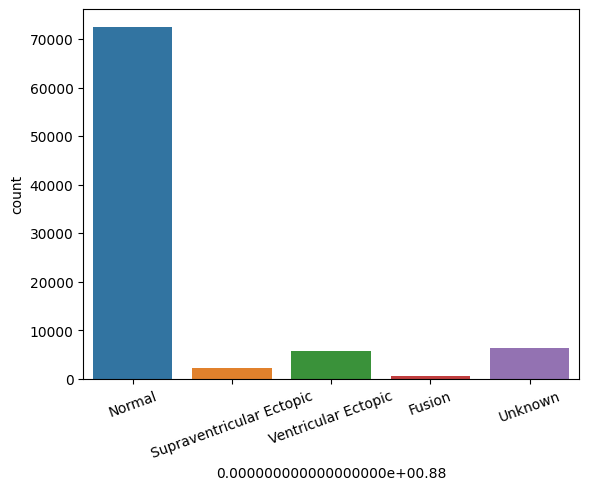

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
chart = sns.countplot(x=train_df.iloc[:,187])
plt.xticks(
    ticks=[0,1,2,3,4], 
    labels=['Normal', 'Supraventricular Ectopic', 
            'Ventricular Ectopic', 'Fusion', 'Unknown'],
    rotation=20
)

In [76]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

Accuracy: 0.9733680507971313


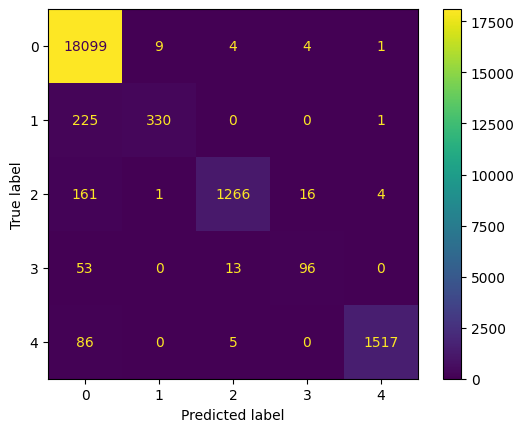

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
